# Imports

In [67]:
# Standard imports for performing the data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Pip install done here because Jupyter Notebooks wasn't
# recognizing the install done in the Anaconda environment
%pip install seaborn

     |████████████████████████████████| 285 kB 4.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import seaborn as sns

# Reading in data and doing first glance check of information

In [5]:
# Import the covid19 data set and look at the first five rows 
covid_data = pd.read_csv('CA_Covid19_data.csv')
# Note: We could include 'index_col = 0' in the line where we read in the data,
# but we want to be able to use the county names later, so we don't specify
# an index column.
covid_data.head(5)

,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
0,San Luis Obispo,2020-03-29,7.0,12.0,NaN,NaN,3.0,4.0,948.0
1,Madera,2020-03-29,1.0,6.0,NaN,NaN,1.0,1.0,8.0
2,Humboldt,2020-03-29,1.0,10.0,NaN,NaN,0.0,0.0,18.0
3,Modoc,2020-03-29,0.0,0.0,NaN,NaN,0.0,0.0,NaN
4,San Diego,2020-03-29,121.0,211.0,NaN,NaN,77.0,39.0,205.0


In [6]:
print('Number of rows: ', covid_data.shape[0], '\nNumber of columns: ', covid_data.shape[1])

Number of rows:  19765 
Number of columns:  9


In [7]:
# Double check the data types for each column
print(covid_data.dtypes)

county                                    object
todays_date                               object
hospitalized_covid_confirmed_patients    float64
hospitalized_suspected_covid_patients    float64
hospitalized_covid_patients              float64
all_hospital_beds                        float64
icu_covid_confirmed_patients             float64
icu_suspected_covid_patients             float64
icu_available_beds                       float64
dtype: object


In [8]:
# Peak at the basic data statistics
covid_data.describe()

,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
count,19757.000000,19757.000000,18480.000000,18390.000000,19736.000000,19736.000000,18961.000000
mean,118.129473,19.854381,141.086147,1252.018271,31.677189,3.017379,47.401245
std,445.515498,67.931196,498.378023,2984.773028,108.209586,10.636017,129.758432
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-110.000000
25%,1.000000,0.000000,2.000000,56.000000,0.000000,0.000000,3.000000
50%,13.000000,1.000000,18.000000,330.000000,4.000000,0.000000,9.000000
75%,72.000000,14.000000,90.000000,1153.750000,20.000000,2.000000,39.000000
max,8098.000000,1350.000000,8422.000000,23989.000000,1731.000000,244.000000,1502.000000


In [9]:
# Check out the built in information for the table before performing analysis.
print(covid_data.info)

<bound method DataFrame.info of                 county todays_date  hospitalized_covid_confirmed_patients  \
0      San Luis Obispo  2020-03-29                                    7.0   
1               Madera  2020-03-29                                    1.0   
2             Humboldt  2020-03-29                                    1.0   
3                Modoc  2020-03-29                                    0.0   
4            San Diego  2020-03-29                                  121.0   
...                ...         ...                                    ...   
19760           Colusa  2021-03-16                                    1.0   
19761      San Joaquin  2021-03-16                                   78.0   
19762           Nevada  2021-03-16                                    8.0   
19763             Napa  2021-03-16                                    4.0   
19764            Marin  2021-03-16                                   15.0   

       hospitalized_suspected_covid_patient

In [10]:
# Check for any null values in the data set
print(covid_data.isnull().sum())

county                                      0
todays_date                                 0
hospitalized_covid_confirmed_patients       8
hospitalized_suspected_covid_patients       8
hospitalized_covid_patients              1285
all_hospital_beds                        1375
icu_covid_confirmed_patients               29
icu_suspected_covid_patients               29
icu_available_beds                        804
dtype: int64


We can see that there are at most 1375 rows that contain null values. Considering that we have 19,765 total rows, removing a small subsection is not that big of a deal. However, we will first work create a copy of the data with the null values removed to check later if it made a difference.

In [12]:
# Check and get a rough idea of how many unique county names are in the data set.
covid_data.county.unique()

array(['San Luis Obispo', 'Madera', 'Humboldt', 'Modoc', 'San Diego',
       'Yolo', 'San Bernardino', 'Mendocino', 'Riverside', 'Stanislaus',
       'Lassen', 'Amador', 'Merced', 'Shasta', 'San Mateo', 'Marin',
       'Solano', 'Butte', 'San Benito', 'Trinity', 'Santa Cruz', 'Kern',
       'El Dorado', 'Sutter', 'Ventura', 'Tulare', 'Sonoma', 'Calaveras',
       'Nevada', 'Inyo', 'Yuba', 'Fresno', 'Lake', 'Tuolumne', 'Glenn',
       'Mono', 'Tehama', 'Santa Clara', 'Los Angeles', 'San Francisco',
       'Contra Costa', 'San Joaquin', 'Placer', 'Siskiyou',
       'Santa Barbara', 'Orange', 'Del Norte', 'Plumas', 'Imperial',
       'Sacramento', 'Alameda', 'Colusa', 'Kings', 'Monterey', 'Napa',
       'Mariposa'], dtype=object)

In [62]:
# Group the covid data together by county
covid_data_by_county = covid_data.groupby(['county'])

# Single out the data for the hospitalized patients that are confirmed to have had covid19
county_pos = covid_data[['county', 'hospitalized_covid_confirmed_patients']]
county_pos = county_pos.groupby(['county'])
county_pos.head(5)

,county,hospitalized_covid_confirmed_patients
0,San Luis Obispo,7.0
1,Madera,1.0
2,Humboldt,1.0
3,Modoc,0.0
4,San Diego,121.0
...,...,...
275,Tulare,4.0
276,Sonoma,8.0
298,Mariposa,0.0
357,Mariposa,0.0


In [14]:
# Print out the first five entries by county. This ends up being long, so it's hard to get a good sense of 
# which county is doing the worst.
for county, hospitalized_covid_confirmed_patients in county_pos:
    print(f"First 5 entries for {county!r}")
    print("----------------")
    print(hospitalized_covid_confirmed_patients.head(5), end = "\n\n")

First 5 entries for 'Alameda'
----------------
      county  hospitalized_covid_confirmed_patients
50   Alameda                                   36.0
95   Alameda                                   59.0
145  Alameda                                   56.0
169  Alameda                                   52.0
272  Alameda                                   57.0

First 5 entries for 'Amador'
----------------
     county  hospitalized_covid_confirmed_patients
11   Amador                                    1.0
75   Amador                                    0.0
143  Amador                                    0.0
185  Amador                                    0.0
240  Amador                                    0.0

First 5 entries for 'Butte'
----------------
    county  hospitalized_covid_confirmed_patients
17   Butte                                    NaN
67   Butte                                    4.0
157  Butte                                    4.0
217  Butte                                

In [20]:
pd.crosstab(county_pos.hospitalized_covid_confirmed_patients, county_pos.county)

county,Alameda,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,Glenn,...,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba
hospitalized_covid_confirmed_patients,,,,,,,,,,,,,,,,,,,,,
0.0,0,125,16,172,137,0,238,81,0,282,...,0,0,353,128,353,0,114,0,48,32
1.0,0,50,20,55,68,0,70,70,0,13,...,1,0,0,31,0,0,72,0,11,24
2.0,0,38,17,40,22,0,31,47,0,3,...,10,0,0,28,0,0,45,0,15,13
3.0,0,24,9,21,21,0,9,25,0,5,...,19,0,0,23,0,0,18,0,22,10
4.0,0,17,11,27,20,0,5,17,0,3,...,11,0,0,13,0,3,10,0,27,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7964.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7966.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8023.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Try using a pivot table to see if we can group together the information in a different way to find the sum
# total of the number of covid positive hospitalized patients over time
pd.pivot_table(county_pos, index='county', columns='hospitalized_covid_confirmed_patients', aggfunc='size')

hospitalized_covid_confirmed_patients,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,7898.0,7906.0,7910.0,7926.0,7949.0,7964.0,7966.0,8023.0,8074.0,8098.0
county,,,,,,,,,,,,,,,,,,,,,
Alameda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amador,125.0,50.0,38.0,24.0,17.0,9.0,10.0,22.0,12.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Butte,16.0,20.0,17.0,9.0,11.0,11.0,19.0,14.0,7.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Calaveras,172.0,55.0,40.0,21.0,27.0,14.0,10.0,3.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colusa,137.0,68.0,22.0,21.0,20.0,27.0,11.0,8.0,7.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contra Costa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Del Norte,238.0,70.0,31.0,9.0,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
El Dorado,81.0,70.0,47.0,25.0,17.0,7.0,8.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This isn't really helpful as we just have a giant table with lots of null values in it. Let's try to graph the data instead to see what counties had the worst number of confirmed hospitalized covid cases.

# Graphing the data

In [39]:
# Let's get the sums of positive patients at the time of downloading the data set.
county_pos_totals = county_pos.sum()
county_pos_totals.sort_values(by='hospitalized_covid_confirmed_patients')

,hospitalized_covid_confirmed_patients
county,
Trinity,0.0
Sutter,0.0
Mariposa,61.0
Modoc,76.0
Plumas,104.0
Del Norte,179.0
Mono,232.0
Lassen,391.0
Glenn,396.0


In [45]:
# The county turned into the index column. Let's fix this so that we can use the county name in analysis later.
county_pos_totals.reset_index(inplace=True)
print(county_pos_totals.dtypes)

county                                    object
hospitalized_covid_confirmed_patients    float64
dtype: object


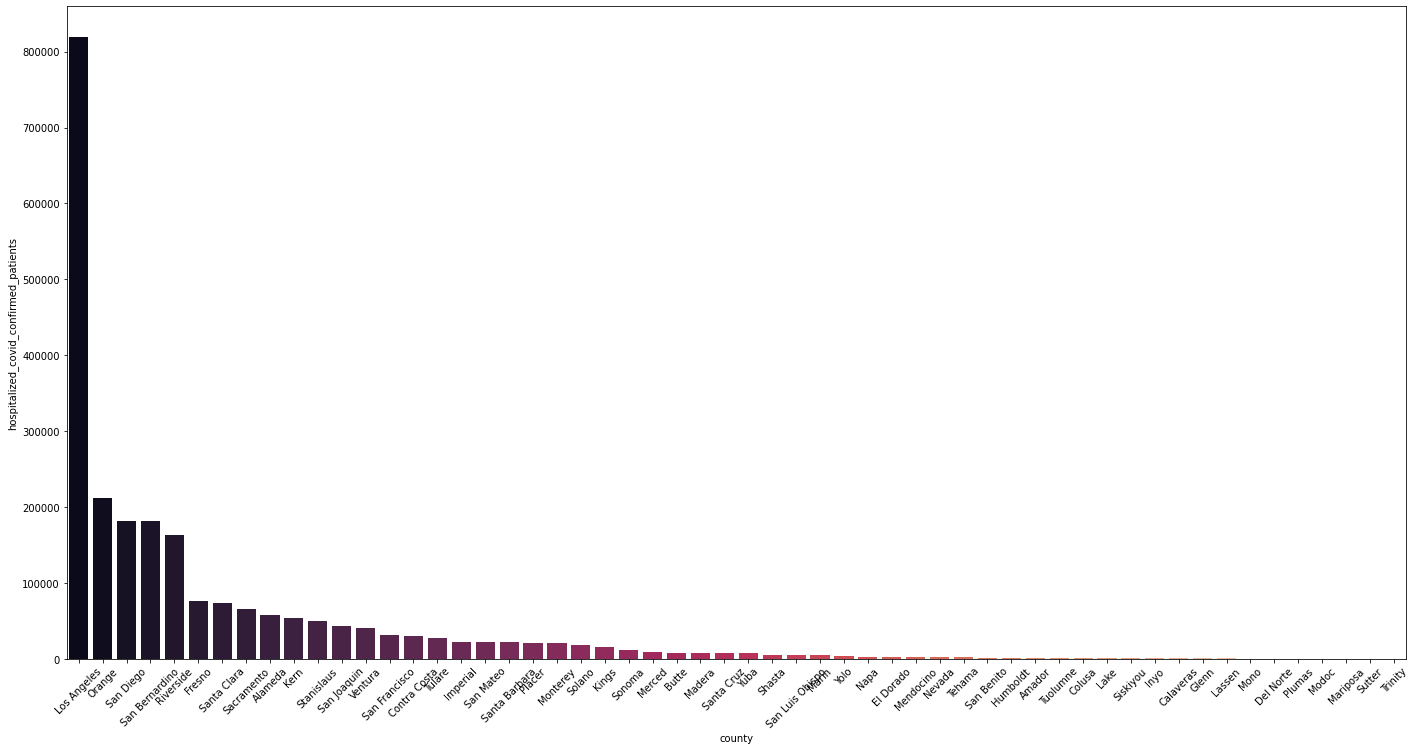

In [70]:
# Let's try plotting the data to see what counties did the worst.
plt.figure(figsize=(24, 12))
plot = sns.barplot(x = 'county', y = 'hospitalized_covid_confirmed_patients', palette='rocket', data=county_pos_totals)
plt.xticks(rotation=45)
plt.show()

This doesn't help us. There are too many counties to look at, and the variety in case number size is so large that we cannot really make sense of it.

In [58]:
county_pos_totals = county_pos_totals.sort_values(by='hospitalized_covid_confirmed_patients', ascending = False)
county_pos_totals

,county,hospitalized_covid_confirmed_patients
17,Los Angeles,818712.0
28,Orange,211875.0
35,San Diego,181479.0
34,San Bernardino,181468.0
31,Riverside,163591.0
8,Fresno,76231.0
41,Santa Clara,73751.0
32,Sacramento,65558.0
0,Alameda,58016.0
13,Kern,54037.0


In [76]:
# Let's try looking at the top 10 counties instead
top_ten_counties = county_pos_totals.head(10)
top_ten_counties

,county,hospitalized_covid_confirmed_patients
17,Los Angeles,818712.0
28,Orange,211875.0
35,San Diego,181479.0
34,San Bernardino,181468.0
31,Riverside,163591.0
8,Fresno,76231.0
41,Santa Clara,73751.0
32,Sacramento,65558.0
0,Alameda,58016.0
13,Kern,54037.0


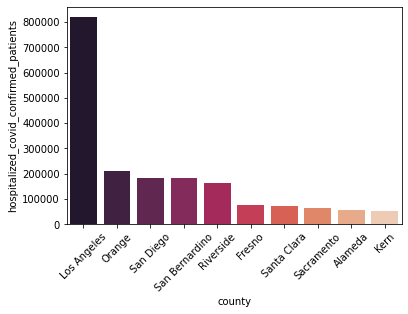

In [77]:
sns.barplot(x = 'county', y = 'hospitalized_covid_confirmed_patients', palette='rocket', data=top_ten_counties)
plt.xticks(rotation=45)
plt.show()

This shows us that LA is the worst county by far. 